In [1]:
import os

os.chdir("../..")

In [2]:
from src.dataset import cgc

cgc_df = cgc.get_cgc_df()
cgc_df.shape

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000


(131476, 20)

In [4]:
cgc_df["exists"].value_counts()

False    88001
True     43475
Name: exists, dtype: int64

In [5]:
cgc_df.head()

,card_name,card_number,card_set,centering,cert_#,corners,edges,game,grade,language,surface,variant_1,year,variant_2,pedigree,error_type,grade_category,rarity,image_urls,exists
key,,,,,,,,,,,,,,,,,,,,
3802460001,Venusaur,15/102,Base Set - Unlimited,9.5,3802460001,5.5,5.5,Pokémon,5.5,English,6,Holo,1999,NaN,NaN,NaN,NaN,NaN,NaN,True
4078625001,Origin Forme Dialga V,177/189,Astral Radiance,10,4078625001,10,10,Pokémon,Perfect 10,English,10,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,True
4115831001,Dragonite,NaN,Unnumbered Promo,NaN,4115831001,NaN,NaN,Pokémon,8.5,Japanese,NaN,Holo,1998,Game Boy Promo,NaN,NaN,NaN,NaN,NaN,True
4115831002,Dragonite,NaN,Unnumbered Promo,NaN,4115831002,NaN,NaN,Pokémon,8.5,Japanese,NaN,Holo,1998,Game Boy Promo,NaN,NaN,NaN,NaN,NaN,True
4115831003,Charizard V,154/172,Brilliant Stars,NaN,4115831003,NaN,NaN,Pokémon,9,English,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,True


In [6]:
from src.shared.storage import DataFrameStorage, Database

new_df = cgc_df[cgc_df["image_urls"].isna() == False]
new_df = new_df[new_df["exists"] == False]

new_df.head()

storage = DataFrameStorage("cgc", db=Database.LOCAL)
storage.set("images", new_df)

In [7]:
cgc_df_cp = cgc_df.copy()


def get_label(row):
    return f"{row['year']}_{row['language']}_{row['card_set']}_{row['card_number']}_{row['card_name']}_{row['variant_1']}_{row['variant_2']}"


cgc_df_cp["label"] = cgc_df_cp.apply(get_label, axis=1)
cgc_df_cp["label"].value_counts()

1999_English_Base Set - Unlimited_4/102_Charizard_Holo_nan                                  2210
2021_English_Shining Fates_SV107/SV122_Charizard VMAX_nan_nan                               1673
2020_English_Black Star Promos_SWSH050_Charizard V_Champion's Path Elite Trainer Box_nan    1328
2016_English_Evolutions_11/108_Charizard_Holo_nan                                           1181
2020_English_Champion's Path_074/073_Charizard VMAX_nan_nan                                 1023
                                                                                            ... 
2017_English_Guardians Rising_156/145_Lycanroc GX_nan_nan                                      1
2002_English_Expedition_61/165_Raichu_Reverse Holo_nan                                         1
2008_English_POP Series 8_1/17_Heatran_nan_nan                                                 1
2018_English_Lost Thunder_120/214_Umbreon_nan_nan                                              1
2021_Korean_Matchless Fighters

In [8]:
cgc_df_cp_cp = cgc_df_cp.groupby("label").head(40).reset_index(drop=True)
cgc_df_cp_cp["label"].value_counts()

1999_English_Base Set - Unlimited_15/102_Venusaur_Holo_nan                              40
2022_Japanese_Dark Phantasma_072/071_Parasect_Character Rare_nan                        40
2021_English_Black Star Promos_SWSH129_Umbreon_Cos. Holo_Evolving Skies 3-Pk. Blstr.    40
2016_English_Evolutions_21/108_Blastoise EX_nan_nan                                     40
2021_English_Fusion Strike_269/264_Mew VMAX_nan_nan                                     40
                                                                                        ..
2017_English_Guardians Rising_156/145_Lycanroc GX_nan_nan                                1
2002_English_Expedition_61/165_Raichu_Reverse Holo_nan                                   1
2008_English_POP Series 8_1/17_Heatran_nan_nan                                           1
2018_English_Lost Thunder_120/214_Umbreon_nan_nan                                        1
2021_Korean_Matchless Fighters_081/070_Klara_nan_nan                                     1

In [9]:
from src.shared.storage import ImageStorage, Database

image_storage = ImageStorage("cgc", db=Database.SAMSUNG_T7)

In [10]:
new_image_storage = ImageStorage("cgc/classification", db=Database.SHARED_CGC)

cgc_df_cp_cp_cp = cgc_df_cp_cp[["cert_#", "label"]]


def get_og_path(row):
    return f"{image_storage.base_path}/0_{row['cert_#']}.jpg"


def get_path(row):
    return f"./db/shared-cgc/jpg/cgc/classification/0_{row['cert_#']}.jpg"


cgc_df_cp_cp["og_image_path"] = cgc_df_cp_cp.apply(get_og_path, axis=1)
cgc_df_cp_cp["image_path"] = cgc_df_cp_cp.apply(get_path, axis=1)
cgc_df_cp_cp.head()

,card_name,card_number,card_set,centering,cert_#,corners,edges,game,grade,language,...,variant_2,pedigree,error_type,grade_category,rarity,image_urls,exists,label,og_image_path,image_path
0,Venusaur,15/102,Base Set - Unlimited,9.5,3802460001,5.5,5.5,Pokémon,5.5,English,...,NaN,NaN,NaN,NaN,NaN,NaN,True,1999_English_Base Set - Unlimited_15/102_Venus...,/Volumes/T7/db/jpg/cgc/0_3802460001.jpg,./db/shared-cgc/jpg/cgc/classification/0_38024...
1,Origin Forme Dialga V,177/189,Astral Radiance,10,4078625001,10,10,Pokémon,Perfect 10,English,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2022_English_Astral Radiance_177/189_Origin Fo...,/Volumes/T7/db/jpg/cgc/0_4078625001.jpg,./db/shared-cgc/jpg/cgc/classification/0_40786...
2,Dragonite,NaN,Unnumbered Promo,NaN,4115831001,NaN,NaN,Pokémon,8.5,Japanese,...,Game Boy Promo,NaN,NaN,NaN,NaN,NaN,True,1998_Japanese_Unnumbered Promo_nan_Dragonite_H...,/Volumes/T7/db/jpg/cgc/0_4115831001.jpg,./db/shared-cgc/jpg/cgc/classification/0_41158...
3,Dragonite,NaN,Unnumbered Promo,NaN,4115831002,NaN,NaN,Pokémon,8.5,Japanese,...,Game Boy Promo,NaN,NaN,NaN,NaN,NaN,True,1998_Japanese_Unnumbered Promo_nan_Dragonite_H...,/Volumes/T7/db/jpg/cgc/0_4115831002.jpg,./db/shared-cgc/jpg/cgc/classification/0_41158...
4,Charizard V,154/172,Brilliant Stars,NaN,4115831003,NaN,NaN,Pokémon,9,English,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2022_English_Brilliant Stars_154/172_Charizard...,/Volumes/T7/db/jpg/cgc/0_4115831003.jpg,./db/shared-cgc/jpg/cgc/classification/0_41158...


In [11]:
import shutil
from concurrent.futures import ThreadPoolExecutor


def copy_images(row):
    if row.index % 100 == 0:
        print(row.index)
    og_image_path = row.og_image_path
    image_path = row.image_path
    if not os.path.exists(image_path):
        shutil.copy(og_image_path, image_path)


def move_all_images(df):
    num_threads = int(os.cpu_count() or 1) * 4

    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        executor.map(copy_images, df.itertuples(index=True))


move_all_images(cgc_df_cp_cp)

In [12]:
from src.classification import LabelClassifier

label_classifier = LabelClassifier()

In [34]:
from src.shared.storage import Database, DataFrameStorage

storage = DataFrameStorage("cgc/classification", db=Database.SHARED_CGC)
storage.set("cards", cgc_df_cp_cp[["cert_#", "label", "image_path"]])

In [35]:
storage.get("cards").head()

,Unnamed: 0,cert_#,label,image_path
0,0,4091732001,1999_English_Base Set - Unlimited_6/102_Gyarad...,./db/shared-cgc/jpg/cgc/classification/0_40917...
1,1,4037320003,2021_English_Celebrations - Classic Coll._4/10...,./db/shared-cgc/jpg/cgc/classification/0_40373...
2,2,4077007001,2016_English_Evolutions_80/108_Misty's Determi...,./db/shared-cgc/jpg/cgc/classification/0_40770...
3,3,4084351001,2000_English_Base Set 2_10/130_Mewtwo_Holo_nan,./db/shared-cgc/jpg/cgc/classification/0_40843...
4,4,4079776001,2020_English_Darkness Ablaze_020/189_Charizard...,./db/shared-cgc/jpg/cgc/classification/0_40797...


In [6]:
os.getcwd()

'/Users/haydendaly/scuola/ds/poke'

In [11]:
from src.shared.image import crop_image, display_image
from src.shared.storage import ImageStorage, Database

image_storage = ImageStorage("pkmncards/sets-eng/base", db=Database.SHARED)

keys = image_storage.get_all_keys()

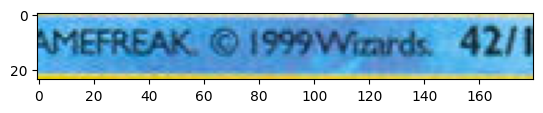

In [30]:
from PIL import Image

local_path = "./db/shared/jpg"
shared_path = "pkmncards/sets-eng/base"

local_image_path = f"{local_path}/{shared_path}/{keys[210]}.jpg"
image = crop_image(Image.open(local_image_path), 0.95, 0.1, 0.02, 0.6)
display_image(image)